In [5]:
import sys

sys.path.append("../src")
import data
import matplotlib.pyplot as plt

In [6]:
# Specify seed here to get consistent results across re-runs
dataset = data.create_utk_face_dataset(images_directory="../data/UTKFace")

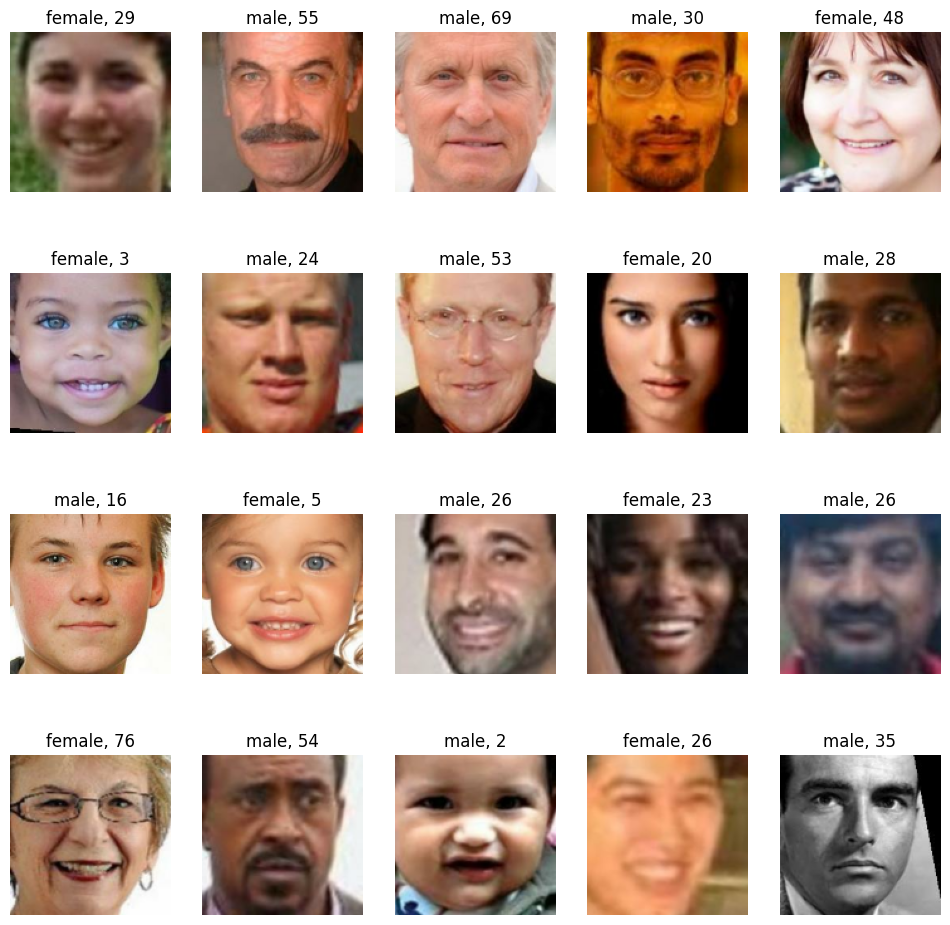

In [7]:
plt.figure(figsize=(12, 12))

for (i, (image, labels)) in enumerate(dataset.take(20).as_numpy_iterator()):
    subplot = plt.subplot(4, 5, i + 1)
    subplot.axis("off")

    gender = labels["gender"]
    age = labels["age"]

    gender = data.GENDER_LABEL_TO_NAME[gender]

    plt.title(f"{gender}, {age}")
    plt.imshow(image)

In [8]:
import pandas as pd

labels_dataset = (dataset
                  .map(lambda _, labels: labels))

labels_df = pd.DataFrame.from_records(labels_dataset.as_numpy_iterator())

labels_df["gender"][labels_df["gender"] == 0] = data.GENDER_LABEL_TO_NAME[0]
labels_df["gender"][labels_df["gender"] == 1] = data.GENDER_LABEL_TO_NAME[1]
labels_df.head()

,age,gender
0,29,female
1,55,male
2,69,male
3,30,male
4,48,female


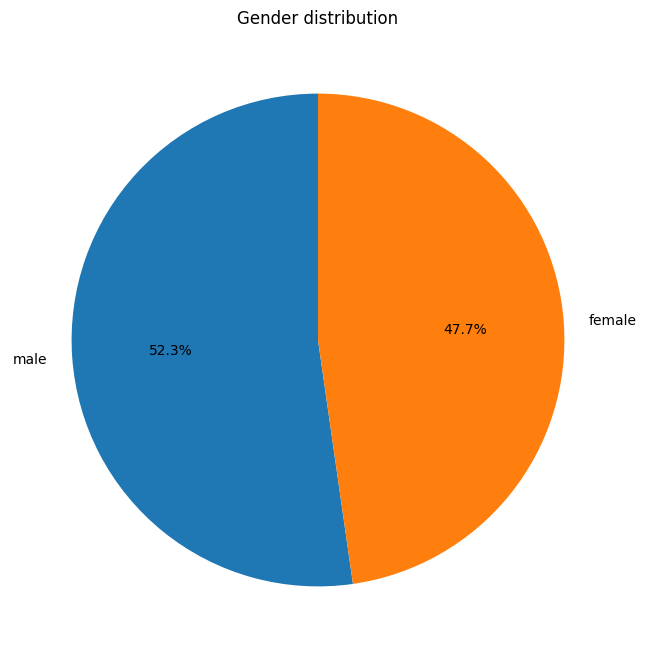

In [9]:
labels = labels_df["gender"].value_counts().index.tolist()
counts = labels_df["gender"].value_counts().values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Gender distribution")
plt.show();

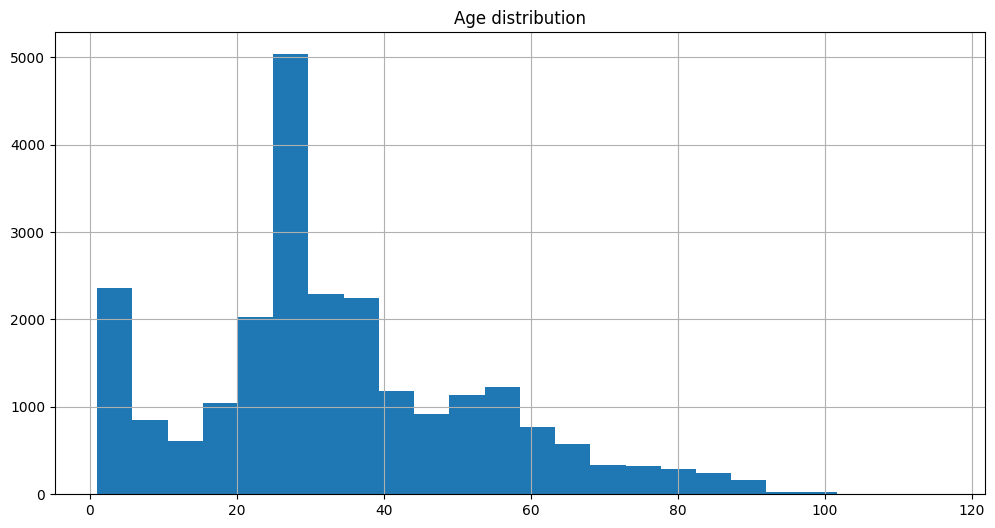

In [10]:
# NUM_BINS = 116
NUM_BINS = 24

plt.figure(figsize=(12, 6))
plt.grid()
plt.hist(
    labels_df["age"],
    bins=NUM_BINS
)
plt.title("Age distribution")
plt.show();

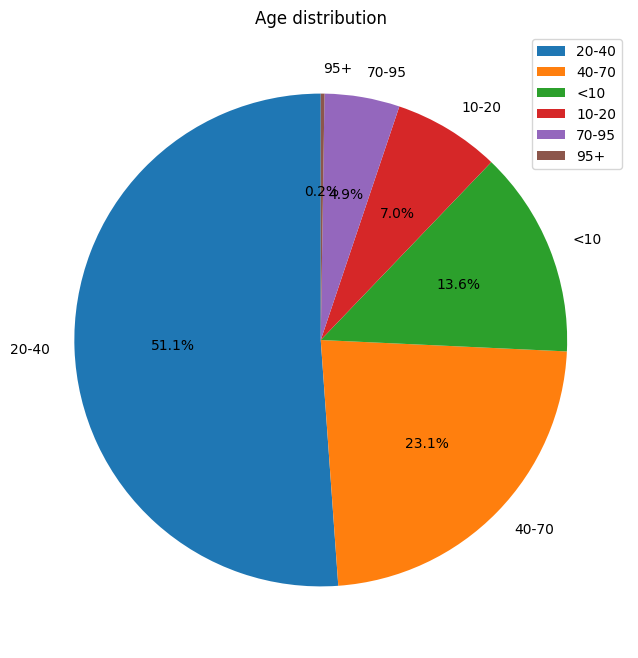

In [11]:
import math

# Bins adjusted by observing the histogram above
bins = [0, 10, 20, 40, 70, 95, math.inf]
names = ["<10", "10-20", "20-40", "40-70", "70-95", "95+"]

age_bins_df = pd.cut(labels_df['age'], bins, labels=names)

labels = age_bins_df.value_counts().index.tolist()
counts = age_bins_df.value_counts().values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.legend()
plt.title("Age distribution")
plt.show();